In [22]:
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df = pd.read_csv(r"metadata.csv", index_col=0)
df.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
cord_uid,,,,,,,,,,,,,,,,,
xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [10]:
df[["title","license","abstract","journal"]].head()

,title,license,abstract,journal
cord_uid,,,,
xqhn0vbp,Airborne rhinovirus detection and effect of ul...,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",BMC Public Health
gi6uaa83,Discovering human history from stomach bacteria,no-cc,Recent analyses of human pathogens have reveal...,Genome Biol
le0ogx1s,A new recruit for the army of the men of death,no-cc,"The army of the men of death, in John Bunyan's...",Genome Biol
fy4w7xz8,Association of HLA class I with severe acute r...,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,BMC Med Genet
0qaoam29,A double epidemic model for the SARS propagation,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,BMC Infect Dis


In [14]:
l = df.groupby("license")
l=l[["has_pdf_parse"]]
l.describe().head()

has_pdf_parse                   
                    count unique   top  freq
license                                     
biorxiv               764      2  True   678
cc-by                9060      2  True  8825
cc-by-nc             1216      2  True  1154
cc-by-nc-nd           727      2  True   641
cc-by-nc-sa           477      2  True   348

In [15]:
d=l.mean().sort_values(by="has_pdf_parse",ascending=False)
d.head()

,has_pdf_parse
license,
cc-by-sa,1.000000
pd,1.000000
cc0,0.992308
cc-by,0.974062
cc-by-nc,0.949013


<Figure size 14400x14400 with 0 Axes>

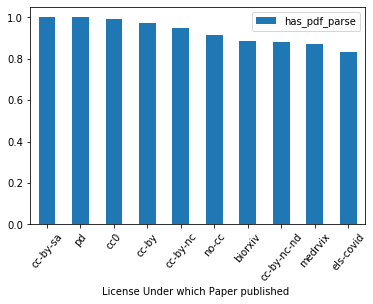

In [16]:
plt.figure(figsize=(200,200))
d.head(10).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("License Under which Paper published ")
plt.ylabel("")
plt.show()

In [17]:
text = df.abstract[0]
text

'BACKGROUND: Rhinovirus, the most common cause of upper respiratory tract infections, has been implicated in asthma exacerbations and possibly asthma deaths. Although the method of transmission of rhinoviruses is disputed, several studies have demonstrated that aerosol transmission is a likely method of transmission among adults. As a first step in studies of possible airborne rhinovirus transmission, we developed methods to detect aerosolized rhinovirus by extending existing technology for detecting infectious agents in nasal specimens. METHODS: We aerosolized rhinovirus in a small aerosol chamber. Experiments were conducted with decreasing concentrations of rhinovirus. To determine the effect of UV irradiation on detection of rhinoviral aerosols, we also conducted experiments in which we exposed aerosols to a UV dose of 684 mJ/m(2). Aerosols were collected on Teflon filters and rhinovirus recovered in Qiagen AVL buffer using the Qiagen QIAamp Viral RNA Kit (Qiagen Corp., Valencia, Ca

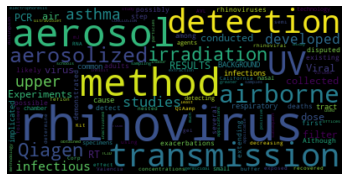

In [18]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
i=0
while i<1000 :
    row=df.abstract[i]
    text=text+str(row)
    i=i+1
print ("There are {} words in the combination of 1000 rows of abstract.".format(len(text)))

There are 1390058 words in the combination of 1000 rows of abstract.


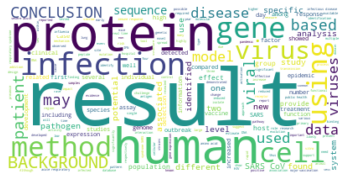

In [21]:
stopwords = set(STOPWORDS)
stopwords.update(["target", "organism", "sample", "strain", "mixed"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()